In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_10020\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Topic of class

In [ ]:
# 

Bootsprapping: replacing a random sample (I.E. generate random training sets, then injecting it into the dataset). replacing the portion of the dataset used for test data, with data that is generated and based on the test data

bagging: creates additional training data

Boosting: reduces bias, produce several prediction functions, then assign each function a weight based on which perform the best.

# ensemble models

In [5]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('../week_06/diabetes.csv')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop('Outcome',axis=1)
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=15)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



In [23]:
from sklearn.ensemble import RandomForestClassifier
# Random forest is aggregates desicion trees, bagging decision trees

forest = RandomForestClassifier(n_estimators=100,random_state=16)
forest.fit(x_train, y_train)
forest.score(x_test,y_test)

0.7316017316017316

In [25]:
ConfusionMatrixDisplay.from_estimator(x_test,x_train)

TypeError: from_estimator() missing 1 required positional argument: 'y'

In [26]:
print(forest.feature_importances_,x.columns)

[0.09152222 0.2731637  0.08516329 0.06606601 0.06122353 0.16695638
 0.11945549 0.13644937] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
tree_5 = forest.estimators[4]
tree.plot_tree(tree_5)
plt.savesvg('forest_tree.svg')

In [15]:
%pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.3/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.7/99.8 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 1.0/99.8 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 1.5/99.8 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 1.6/99.8 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 1.8/99.8 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 2.2/99.8 MB 5.5 MB/s eta 0:00:18
   - -------------------------------------- 2.6/99.8 MB 5.7 MB/s eta 0:00:17
   - -------------------------------------- 3.0/99.8 MB 5.8 MB/s eta 0:00:17
   - -------------------------------------- 3.5/99.8 MB 6.0 MB/s eta 0:00:17
   - -------------------------------------- 3.9/99.8 MB 6.1 MB/s eta 0:00:16
   - -


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

y_pred2 = xgb.predict(x_test)

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score
#ROC = "reciever operating charecteristic curve"
#ROC curve summarize the tradeoff between true positives and false positives,
#best for balanced datasets. 

#fpr = flase positive rate

fpr,tpr,thresholds = roc_curve(y_test,y_pred2)
auc = roc_auc_score(y_test,y_pred2)

auc

0.6965669014084507

Text(0, 0.5, 'true positive rate')

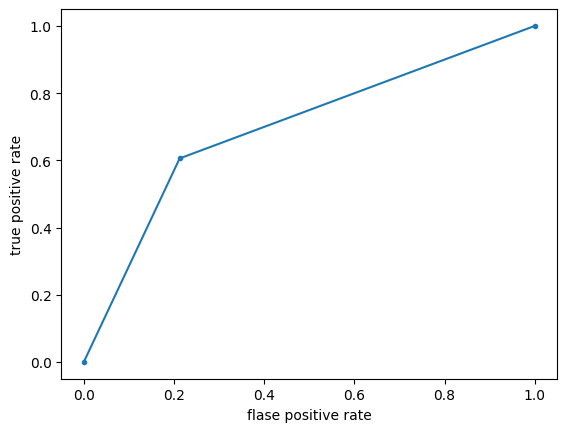

In [29]:
plt.plot(fpr,tpr,marker = '.')
plt.xlabel('flase positive rate')
plt.ylabel('true positive rate')